In [1]:
## mount the Google drive to get access to files in your drive ##
#from google.colab import drive
#drive.mount('/content/drive')

## set the folder that stores your files and data as your current directory ##
#%cd /content/drive/My\ Drive/Colab\ Notebooks

In [2]:
# import commonly used libraries

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# to display multiple outputs in one cell
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

# The Five-instance Example

In [3]:
# define the dataset with five instances characterized by two features
X1 = np.array([[1,2], [1,2.5], [3,1], [4,0.5], [4,2]])

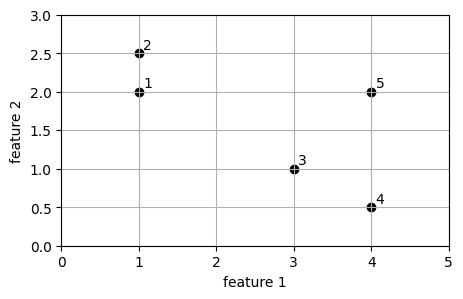

In [4]:
#visualize the data
plt.figure(figsize=(5, 3))

plt.scatter(X1[:,0], X1[:,1], c='k')

# Create numbered labels for each point
for i in range(X1.shape[0]):
    plt.annotate(str(i+1), 
                 xy=(X1[i,0], X1[i,1]), 
                 xytext=(3, 3), 
                 textcoords='offset points')

plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.xlim([0,5]), plt.ylim([0,3])
#plt.xticks(range(5)), plt.yticks(range(3))
plt.grid()

plt.show();

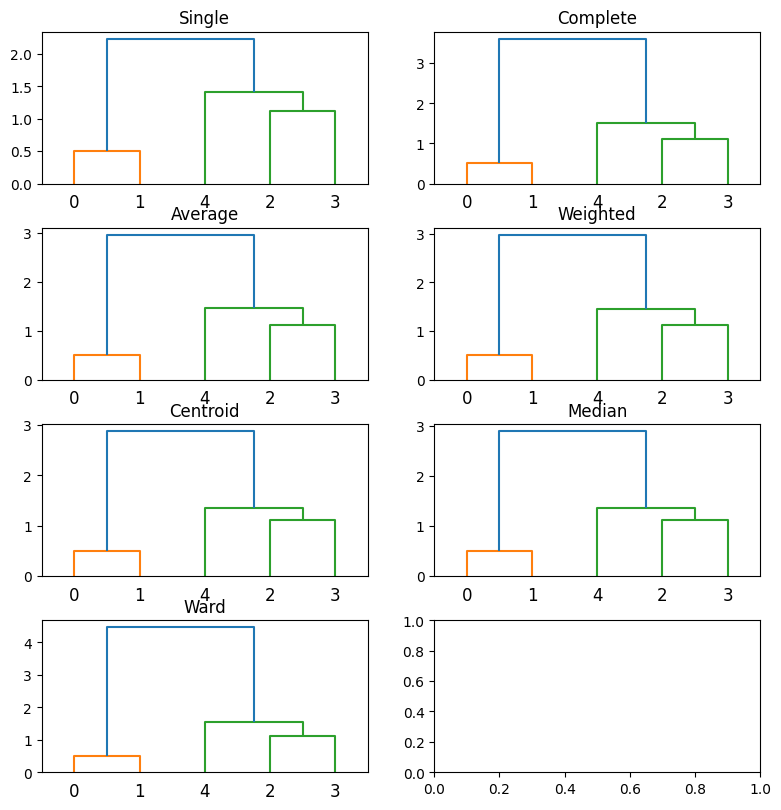

In [5]:
# use dendrogram to represent the clustering process
from scipy.cluster.hierarchy import linkage, dendrogram

y1 = linkage(X1, method='single', metric='euclidean')
y2 = linkage(X1, method='complete', metric='euclidean')
y3 = linkage(X1, method='average', metric='euclidean')
y4 = linkage(X1, method='weighted', metric='euclidean')
y5 = linkage(X1, method='centroid', metric='euclidean')
y6 = linkage(X1, method='median', metric='euclidean')
y7 = linkage(X1, method='ward', metric='euclidean')


plt.subplots(nrows=4, ncols=2, figsize=(8, 8))
plt.tight_layout()

plt.subplot(4,2,1), dendrogram(y1), plt.title('Single')
plt.subplot(4,2,2), dendrogram(y2), plt.title('Complete')
plt.subplot(4,2,3), dendrogram(y3), plt.title('Average')
plt.subplot(4,2,4), dendrogram(y4), plt.title('Weighted')
plt.subplot(4,2,5), dendrogram(y5), plt.title('Centroid')
plt.subplot(4,2,6), dendrogram(y6), plt.title('Median')
plt.subplot(4,2,7), dendrogram(y7), plt.title('Ward')

plt.show();

# Protein Sources

protein.csv contains information for nine different protein sources and their respective consumption from various countries.

In [6]:
# import data
df = pd.read_csv('Data/protein.csv')
df

,Country,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
0,Albania,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7
1,Austria,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3
2,Belgium,13.5,9.3,4.1,17.5,4.5,26.6,5.7,2.1,4.0
3,Bulgaria,7.8,6.0,1.6,8.3,1.2,56.7,1.1,3.7,4.2
4,Czechoslovakia,9.7,11.4,2.8,12.5,2.0,34.3,5.0,1.1,4.0
5,Denmark,10.6,10.8,3.7,25.0,9.9,21.9,4.8,0.7,2.4
6,E Germany,8.4,11.6,3.7,11.1,5.4,24.6,6.5,0.8,3.6
7,Finland,9.5,4.9,2.7,33.7,5.8,26.3,5.1,1.0,1.4
8,France,18.0,9.9,3.3,19.5,5.7,28.1,4.8,2.4,6.5
9,Greece,10.2,3.0,2.8,17.6,5.9,41.7,2.2,7.8,6.5


In [7]:
# dataset with 9 features
X2= df.iloc[:,1:10]

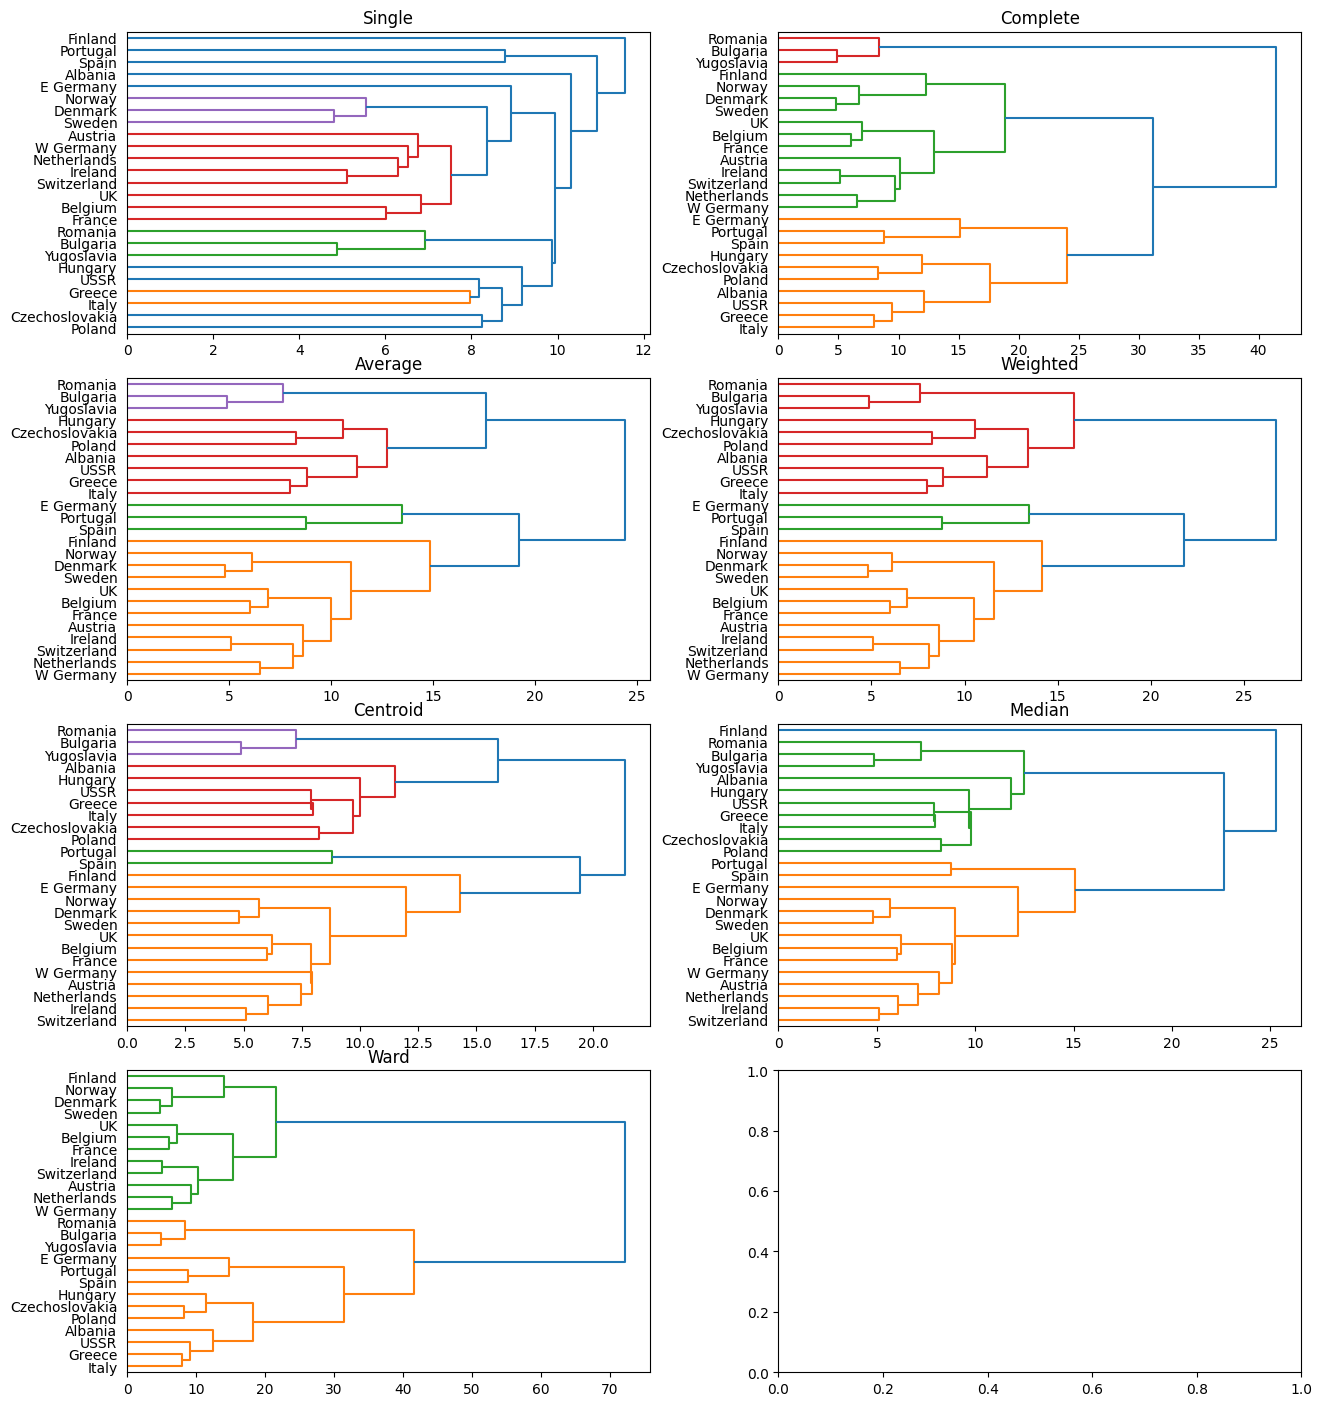

In [8]:
# use dendrogram to represent the agglomerative clustering process
from scipy.cluster.hierarchy import linkage

y1 = linkage(X2, method='single', metric='euclidean')
y2 = linkage(X2, method='complete', metric='euclidean')
y3 = linkage(X2, method='average', metric='euclidean')
y4 = linkage(X2, method='weighted', metric='euclidean')
y5 = linkage(X2, method='centroid', metric='euclidean')
y6 = linkage(X2, method='median', metric='euclidean')
y7 = linkage(X2, method='ward', metric='euclidean')

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(6,14))
fig.tight_layout()
plt.subplots_adjust(left=-1)

labelList = list(df['Country'])

plt.subplot(4,2,1), dendrogram(y1, labels=labelList, orientation='right', distance_sort='descending',), plt.title('Single')
plt.subplot(4,2,2), dendrogram(y2, labels=labelList, orientation='right', distance_sort='descending',), plt.title('Complete')
plt.subplot(4,2,3), dendrogram(y3, labels=labelList, orientation='right', distance_sort='descending',), plt.title('Average')
plt.subplot(4,2,4), dendrogram(y4, labels=labelList, orientation='right', distance_sort='descending',), plt.title('Weighted')
plt.subplot(4,2,5), dendrogram(y5, labels=labelList, orientation='right', distance_sort='descending',), plt.title('Centroid')
plt.subplot(4,2,6), dendrogram(y6, labels=labelList, orientation='right', distance_sort='descending',), plt.title('Median')
plt.subplot(4,2,7), dendrogram(y7, labels=labelList, orientation='right', distance_sort='descending',), plt.title('Ward')

plt.show();

<Figure size 800x600 with 0 Axes>

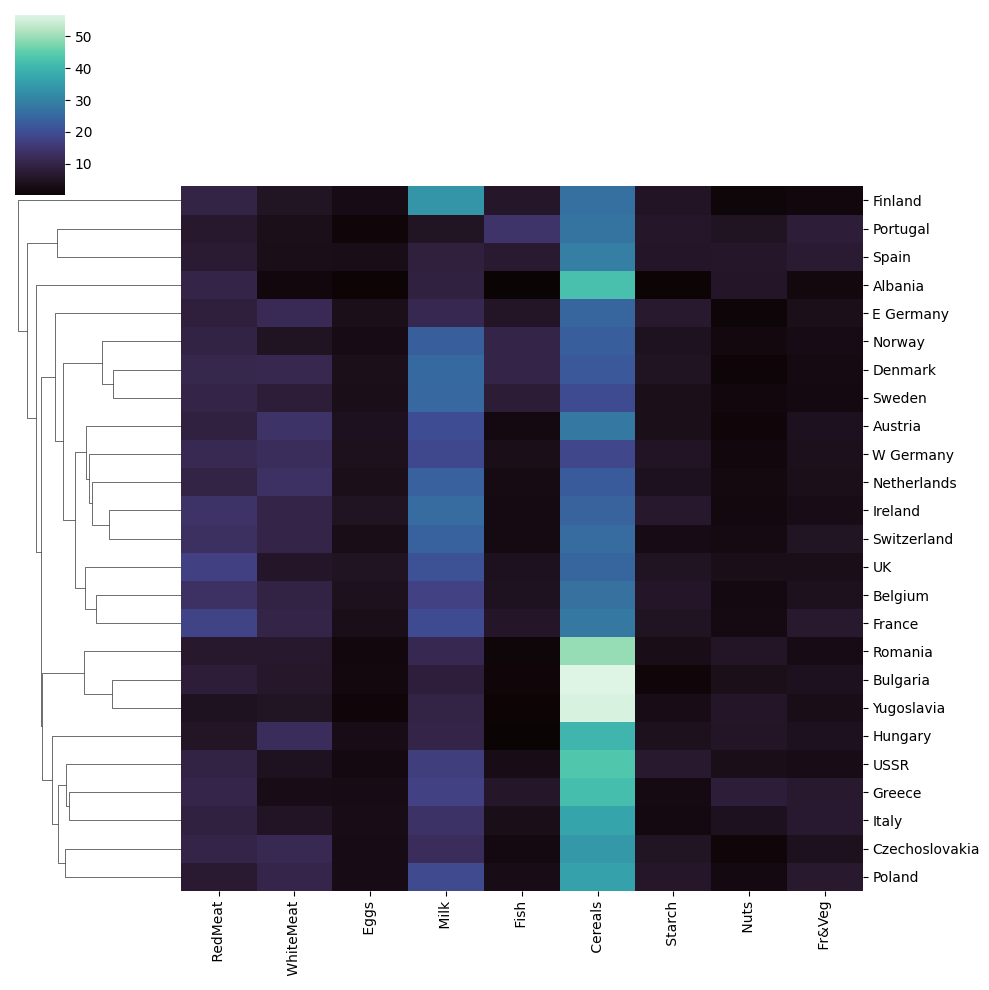

In [9]:
# try the clustermap function in seaborn
plt.figure(figsize=(8,6))
labelList = list(df['Country'])
sns.clustermap(X2, col_cluster=False,method='single', metric='euclidean',cmap='mako',yticklabels=labelList)
plt.show()

# MNIST Dataset

## Data preprocessing

In [10]:
# load data
from sklearn import datasets
# Load Digits dataset and take a look at the data description
digits = datasets.load_digits() #load data
print(digits.DESCR)
digits.keys()

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [11]:
(n_samples, n_features), n_digits = digits.data.shape, np.unique(digits.target).size

print(f"# digits: {n_digits}; # samples: {n_samples}; # features {n_features}")

# digits: 10; # samples: 1797; # features 64


In [12]:
df = pd.DataFrame(digits['data'],columns=digits['feature_names'])
print(df.head())


   pixel_0_0  pixel_0_1  pixel_0_2  pixel_0_3  pixel_0_4  pixel_0_5  \
0        0.0        0.0        5.0       13.0        9.0        1.0   
1        0.0        0.0        0.0       12.0       13.0        5.0   
2        0.0        0.0        0.0        4.0       15.0       12.0   
3        0.0        0.0        7.0       15.0       13.0        1.0   
4        0.0        0.0        0.0        1.0       11.0        0.0   

   pixel_0_6  pixel_0_7  pixel_1_0  pixel_1_1  ...  pixel_6_6  pixel_6_7  \
0        0.0        0.0        0.0        0.0  ...        0.0        0.0   
1        0.0        0.0        0.0        0.0  ...        0.0        0.0   
2        0.0        0.0        0.0        0.0  ...        5.0        0.0   
3        0.0        0.0        0.0        8.0  ...        9.0        0.0   
4        0.0        0.0        0.0        0.0  ...        0.0        0.0   

   pixel_7_0  pixel_7_1  pixel_7_2  pixel_7_3  pixel_7_4  pixel_7_5  \
0        0.0        0.0        6.0       13.0

## Feature Extraction

In [13]:
from sklearn.decomposition import PCA
No_PC = 64 # define the number of principal components. Here we use No_PC = the total number of attributes in order to observe the contribution of every principal component. Feel free to choose smaller numbers
pca = PCA() # define PCA analysis # n_components using PCA(the number of pinrcipal components)

pca.fit(df) # fit the model on the normalized dataset (i.e., this determines the loadings)
df_pca = pca.transform(df) # apply dimensional reduction to the normalized data to obtain principal components


In [14]:
# the proportion of variances explained by PCs
print(pca.explained_variance_ratio_.round(3),'\n')

# the proportion of variances explained by top PCs
X_var_ratio_cum=np.cumsum(pca.explained_variance_ratio_) # no.cumsum() returns the cumulative sum of the elements along a given axis
print(X_var_ratio_cum.round(3))

[0.149 0.136 0.118 0.084 0.058 0.049 0.043 0.037 0.034 0.031 0.024 0.023
 0.018 0.018 0.015 0.014 0.013 0.012 0.01  0.009 0.009 0.008 0.008 0.007
 0.007 0.006 0.006 0.005 0.005 0.004 0.004 0.004 0.003 0.003 0.003 0.003
 0.003 0.002 0.002 0.002 0.002 0.002 0.002 0.001 0.001 0.001 0.001 0.001
 0.001 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.   ] 

[0.149 0.285 0.403 0.487 0.545 0.594 0.637 0.674 0.707 0.738 0.762 0.785
 0.803 0.821 0.835 0.849 0.863 0.875 0.885 0.894 0.903 0.911 0.919 0.926
 0.933 0.939 0.945 0.95  0.955 0.959 0.963 0.966 0.97  0.973 0.976 0.979
 0.982 0.984 0.986 0.988 0.99  0.992 0.993 0.995 0.996 0.997 0.998 0.999
 0.999 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.   ]


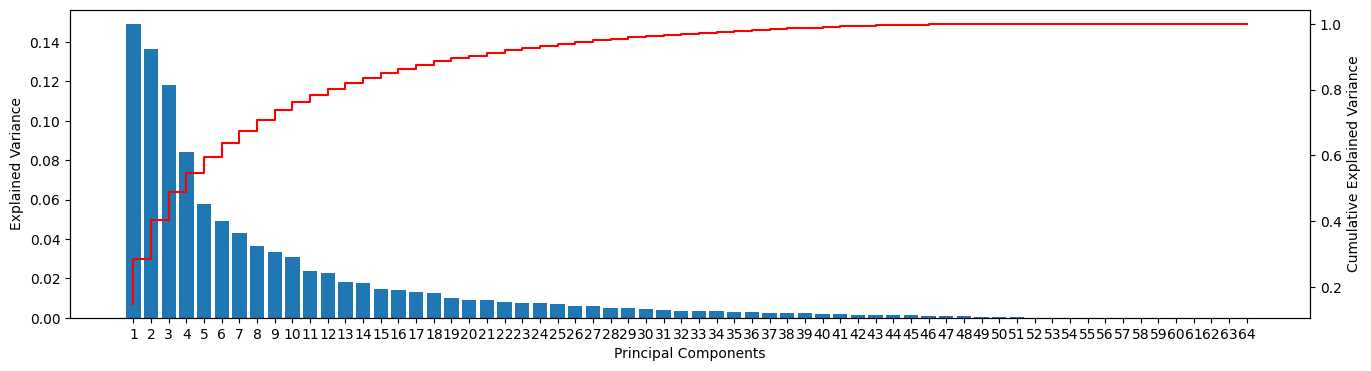

In [15]:
# Visualize the variance explained by different principal components
fig, ax = plt.subplots(1,1, figsize=(16,4))
# we use a bar chart to show the variance explained by each principal component
ax.bar(np.arange(1,No_PC+1,1), pca.explained_variance_ratio_)
ax.set_xticks(range(1,No_PC+1))
ax.set_xlabel('Principal Components')
ax.set_ylabel('Explained Variance')
# we use the line chart or step chart to show the cumulative variance explained by the top n principal components
ax2 = ax.twinx() # .twinx() creates the secondary axes by sharing the x axis
ax2.step(range(1,No_PC+1),X_var_ratio_cum, color='red')
ax2.set_ylabel('Cumulative Explained Variance')
plt.show();

In [16]:
# Select features for the clustering analysis
X3=df_pca[:,0:39]

y=digits['target'] # true label

## Agglomerative Clustering

In [17]:
# Clustering analysis
from sklearn.cluster import AgglomerativeClustering
Cluster= AgglomerativeClustering(n_clusters=10, 
                                 metric='euclidean', 
                                 linkage='ward').fit(X3) # metric is for calculating linkages, linkage is the linkage criterion to use for clustering


In [18]:
# evaluation
from sklearn import metrics
y_predict = Cluster.labels_
print(f'homogeneity score is: {metrics.homogeneity_score(y,y_predict):.4f}','\n')
print(f'completeness score is: {metrics.completeness_score(y,y_predict):.4f}','\n')
print(f'v measure score is: {metrics.v_measure_score(y,y_predict):.4f}','\n')
print(f'adjusted rand score is: {metrics.adjusted_rand_score(y,y_predict):.4f}','\n')
print(f'adjusted mutual info score is: {metrics.adjusted_mutual_info_score(y,y_predict):.4f}','\n')
print(f'silhouette score is: {metrics.silhouette_score(df,y_predict,metric="euclidean",sample_size=300,random_state=0):.4f}','\n')


homogeneity score is: 0.8526 

completeness score is: 0.8729 

v measure score is: 0.8627 

adjusted rand score is: 0.7911 

adjusted mutual info score is: 0.8613 

silhouette score is: 0.1660 



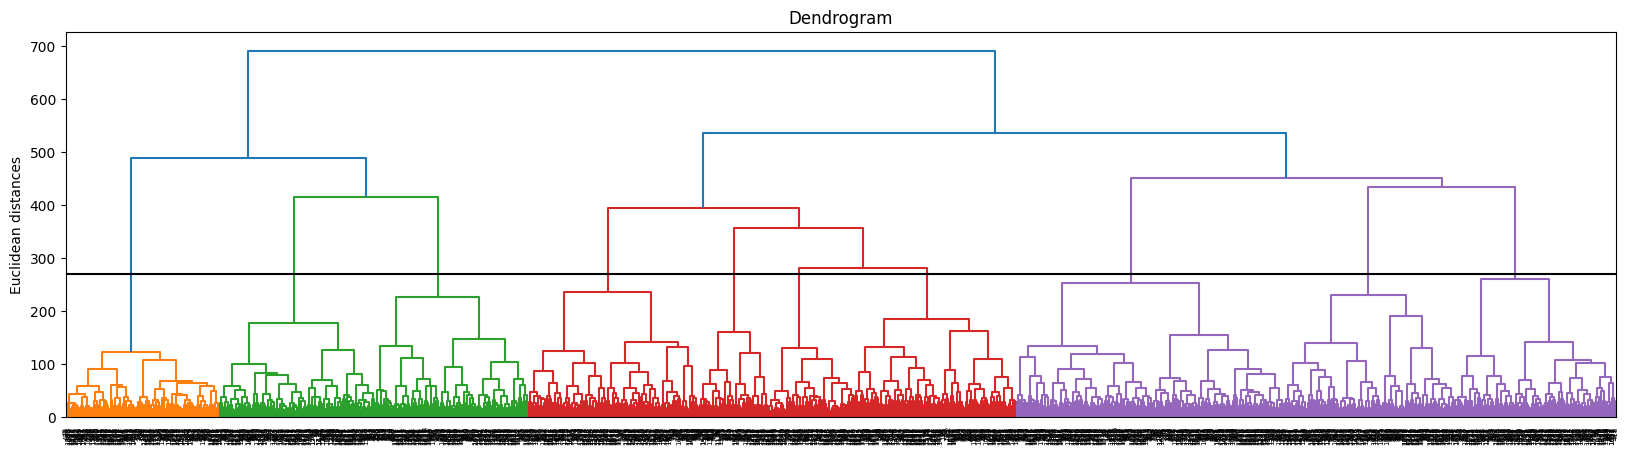

In [19]:
# representation by Dendrogram
import scipy.cluster.hierarchy as sch
from matplotlib import pyplot
pyplot.figure(figsize=(20, 5))
dendrogram = sch.dendrogram(sch.linkage(X3, method = 'ward',metric='euclidean'))
plt.title('Dendrogram')
plt.ylabel('Euclidean distances')
# Cutting the dendrogram at max_d
plt.axhline(y=270, c='k')
plt.show();

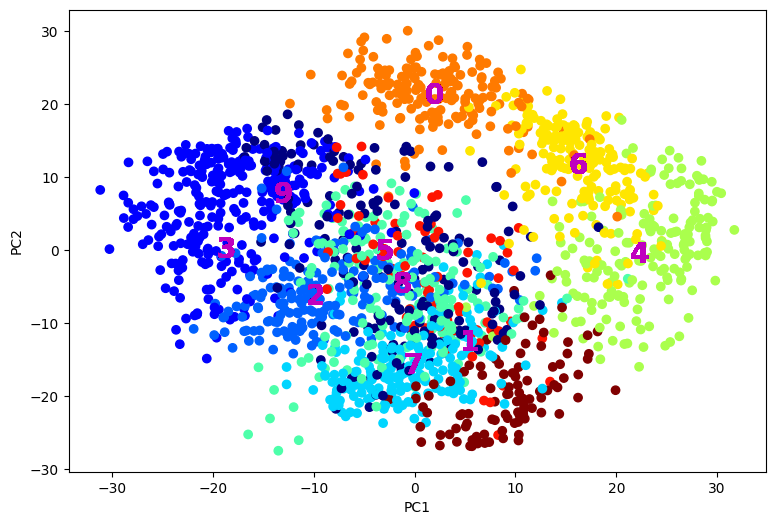

In [20]:
# visualize the result on the space of PC1 and PC2
plt.figure(figsize=(9,6))

plt.scatter(X3[:,0], X3[:,1], c=y_predict, cmap="jet")
plt.xlabel("PC1")
plt.ylabel("PC2")

data = pd.DataFrame(np.concatenate((X3[:,range(0,2)], np.reshape(y, (-1, 1))), axis=1)) #np.reshape(y,(-1,1)) means to reshape y into a column

for i, number in enumerate(y):
        plt.annotate(number,
                     data.loc[data[2]==number,[0,1]].mean(),
                     horizontalalignment='center',
                     verticalalignment='center',
                     weight='bold',
                     size='20',
                     color='m')

## K-mean

This example is adopted from the Sklean

In [21]:
from time import time

from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler



In [22]:
def bench_k_means(kmeans, name, data, labels):
    """ evaluate the KMeans initialization methods.

    Parameters
    ----------
    kmeans : KMeans instance
        A class:`~sklearn.cluster.KMeans` instance with the initialization
        already set.
    name : str
        Name given to the strategy. It will be used to show the results in a
        table.
    data : ndarray of shape (n_samples, n_features)
        The data to cluster.
    labels : ndarray of shape (n_samples,)
        The labels used to compute the clustering metrics which requires some
        supervision.
    """
    t0 = time()
    estimator = make_pipeline(StandardScaler(), kmeans).fit(data)
    fit_time = time() - t0
    results = [name, fit_time, estimator[-1].inertia_]

    # Define the metrics which require only the true labels and estimator
    # labels
    clustering_metrics = [
        metrics.homogeneity_score,
        metrics.completeness_score,
        metrics.v_measure_score,
        metrics.adjusted_rand_score,
        metrics.adjusted_mutual_info_score,
    ]
    results += [m(labels, estimator[-1].labels_) for m in clustering_metrics]

    # The silhouette score requires the full dataset
    results += [
        metrics.silhouette_score(
            data,
            estimator[-1].labels_,
            metric="euclidean",
            sample_size=300,
        )
    ]

    # Show the results
    formatter_result = (
        "{:9s}\t{:.3f}s\t{:.0f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}"
    )
    print(formatter_result.format(*results))

In [23]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

print(82 * "_")
print("init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette")

# use the k-mean++ method for initialization
kmeans = KMeans(init="k-means++", 
                n_clusters=n_digits, 
                n_init=4, 
                random_state=0)
bench_k_means(kmeans=kmeans, 
              name="k-means++", 
              data=df, 
              labels=y)

# randomly select 10 instances as the initial centers of clusters
kmeans = KMeans(init="random", 
                n_clusters=n_digits, 
                n_init=4, 
                random_state=0)
bench_k_means(kmeans=kmeans, 
              name="random", 
              data=df, 
              labels=y)

# extract the top 10 principal components as the initial centers of clusters
pca = PCA(n_components=n_digits).fit(df)
kmeans = KMeans(init=pca.components_, 
                n_clusters=n_digits, 
                n_init=1)
bench_k_means(kmeans=kmeans, 
              name="PCA-based", 
              data=df, 
              labels=y)

print(82 * "_")


__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	0.651s	69662	0.680	0.719	0.699	0.570	0.695	0.176
random   	0.285s	69707	0.675	0.716	0.694	0.560	0.691	0.189
PCA-based	0.235s	72686	0.636	0.658	0.647	0.521	0.643	0.116
__________________________________________________________________________________


## Gaussian Mixture Model

In [24]:
# Gaussian Mixture
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=10, 
                     random_state=0).fit(df)
y_predict = gm.predict(df)

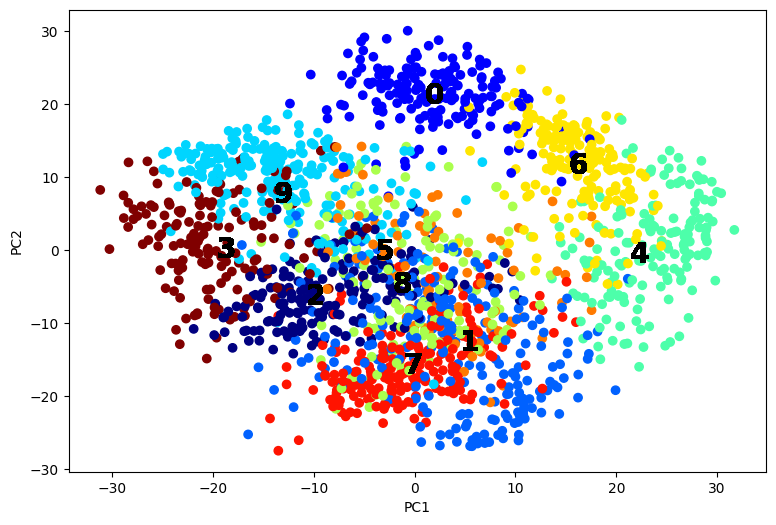

In [25]:
# visualize the result on the space of PC1 and PC2
plt.figure(figsize=(9,6))

plt.scatter(df_pca[:,0], df_pca[:,1], 
            c=y_predict, 
            cmap="jet")
plt.xlabel("PC1")
plt.ylabel("PC2")


data = pd.DataFrame(np.concatenate((df_pca[:,[0,1]], np.reshape(y, (-1, 1))), axis=1)) #np.reshape(y,(-1,1)) means to reshape y into a column

for i, number in enumerate(y):
        plt.annotate(number,
                     data.loc[data[2]==number,[0,1]].mean(),
                     horizontalalignment='center',
                     verticalalignment='center',
                     weight='bold',
                     size='20',
                     color='k')

In [26]:

# evaluation
print(f'homogeneity score is: {metrics.homogeneity_score(y,y_predict):.4f}','\n')
print(f'completeness score is: {metrics.completeness_score(y,y_predict):.4f}','\n')
print(f'v measure score is: {metrics.v_measure_score(y,y_predict):.4f}','\n')
print(f'adjusted rand score is: {metrics.adjusted_rand_score(y,y_predict):.4f}','\n')
print(f'adjusted mutual info score is: {metrics.adjusted_mutual_info_score(y,y_predict):.4f}','\n')
print(f'silhouette score is: {metrics.silhouette_score(df,y_predict,metric="euclidean",sample_size=300,random_state=0):.4f}','\n')


homogeneity score is: 0.7518 

completeness score is: 0.7606 

v measure score is: 0.7561 

adjusted rand score is: 0.6778 

adjusted mutual info score is: 0.7537 

silhouette score is: 0.1658 

